In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the image
img = cv.imread('./cxk.png', cv.IMREAD_GRAYSCALE)
# resize the image
img = cv.resize(img, (256, 256))
# Threshold the image to create a binary image
_, binary_img = cv.threshold(img, 160, 255, cv.THRESH_BINARY)
# invert the binary image
binary_img = cv.bitwise_not(binary_img)

plt.imshow(binary_img, cmap='gray')


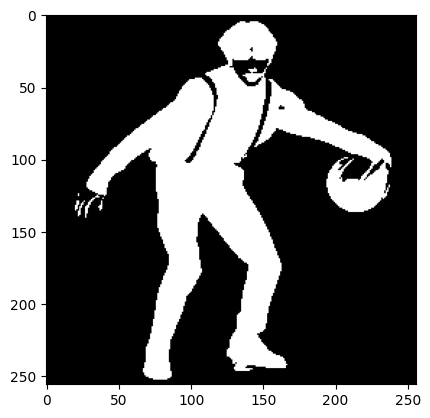

In [9]:

# Find contours
contours, _ = cv.findContours(binary_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Create an empty image for drawing contours
contour_img = np.zeros_like(img)

# Draw contours
cv.drawContours(contour_img, contours, -1, (255), thickness=cv.FILLED)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

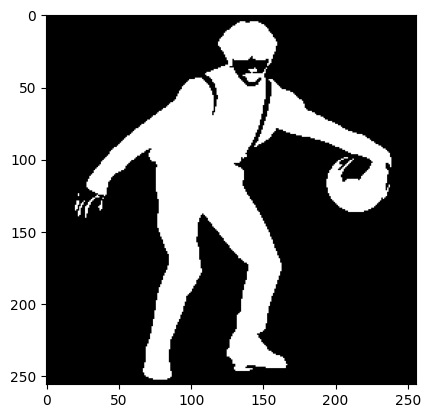

In [10]:
plt.imshow(contour_img, cmap='gray')

In [11]:
# extract the all the contours points
all_contour_points = []
for i in range(len(contours)):
    for j in range(len(contours[i])):
        all_contour_points.append(contours[i][j][0])

all_contour_points = np.array(all_contour_points)

# map the points to the 5 5 grid
mapped_points = np.zeros_like(all_contour_points)
max = np.max(all_contour_points, axis=0)
min = np.min(all_contour_points, axis=0)
mapped_points = (all_contour_points - min) / (max - min) * 5

In [12]:
# save to contour.txt
np.savetxt('contour.txt', mapped_points, fmt='%f', delimiter=' ')

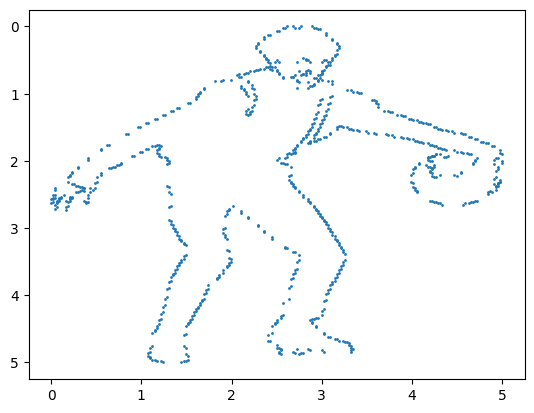

In [13]:
# draw the contour points
plt.scatter(mapped_points[:, 0], mapped_points[:, 1], s=1)
plt.gca().invert_yaxis()
plt.show()


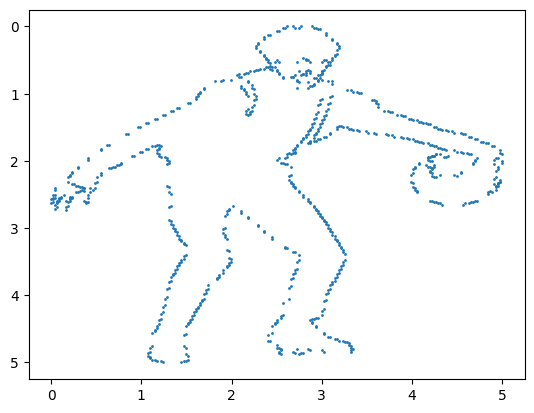

In [14]:
# 调整contour.txt中的点，使得点的顺序是连续的
import numpy as np
import matplotlib.pyplot as plt

# Load the contour points
contour_points = np.loadtxt('contour.txt')

# Plot the contour points
plt.scatter(contour_points[:, 0], contour_points[:, 1], s=1)
plt.gca().invert_yaxis()
plt.show()


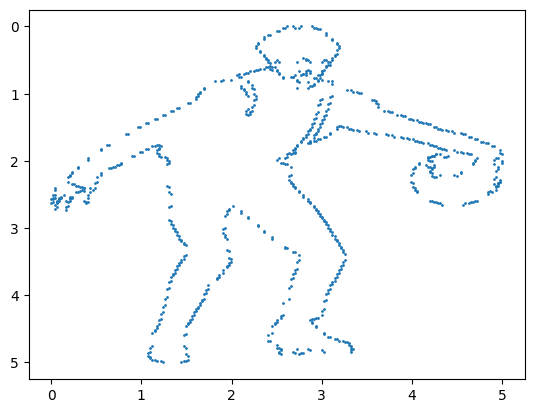

In [15]:
sorted_points = []
sorted_points.append(contour_points[0])
contour_points = np.delete(contour_points, 0, axis=0)
while len(contour_points) > 0:
    last_point = sorted_points[-1]
    min_dist = np.inf
    min_idx = -1
    for i in range(len(contour_points)):
        dist = np.linalg.norm(last_point - contour_points[i])
        if dist < min_dist:
            min_dist = dist
            min_idx = i
    sorted_points.append(contour_points[min_idx])
    contour_points = np.delete(contour_points, min_idx, axis=0)

sorted_points = np.array(sorted_points)

# Plot the sorted contour points
plt.scatter(sorted_points[:, 0], sorted_points[:, 1], s=1)
plt.gca().invert_yaxis()
plt.show()


In [17]:
# save to sorted_contour.txt
np.savetxt('sorted_contour.txt', sorted_points, fmt='%f', delimiter=' ')